# Bar plot and glass brain of results - Prisma

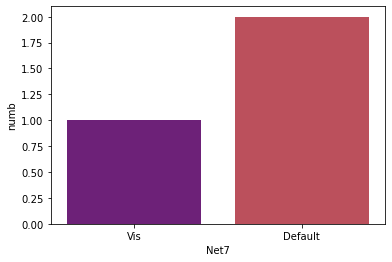

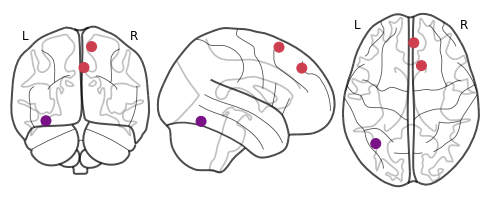

In [33]:
import pandas as pd
import numpy as np 
import nilearn
from nilearn import plotting
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib

# .nii con los resultados de randomise
fle= 'Ttest_CTRLvsTAB_MR1_vox_corrp_tstat1.nii.gz'

my_pth = 'results/stats_funcS_prisma1/'
# Mapeo personalizado de de Shaefer 7Net con info de colores
coord_schaef= pd.read_csv('data/Schaefer2018_400Parc_Map_7NetColor.csv')
# archivo con cabeceras de medidas
labels= pd.read_csv('data/labelling_funcS.csv', header= None)

yeo_palett = {'Vis': (0.47058823529411764, 0.07058823529411765, 0.5254901960784314),
 'SomMot': (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
 'DorsAttn': (0.0, 0.4627450980392157, 0.054901960784313725),
 'SalVentAttn': (0.7686274509803922, 0.22745098039215686, 0.9803921568627451),
 'Limbic': (0.8627450980392157, 0.9725490196078431, 0.6431372549019608),
 'Cont': (0.9019607843137255, 0.5803921568627451, 0.13333333333333333),
 'Default': (0.803921568627451, 0.24313725490196078, 0.3058823529411765),
 'other': (0.7, 0.7, 0.7),
 'TempPar': (0, 0, 0.99)}


labels= np.asarray(labels.iloc[:,0])
img = nib.load(my_pth + fle)
img_data = img.get_fdata()
idx_sign= np.where(img_data>0.95)[0]
labels_sign= labels[idx_sign]
pvals= img_data[idx_sign]

# Mapeo de rois significativas 
coord_schaef.set_index('roi_name', inplace= True)
coord_schaef= coord_schaef.loc[labels_sign]

# matriz de adyacencia. Necesario para graficar con plot_connectome
adj_mat = np.zeros((len(labels_sign), len(labels_sign)))

# Conteo de rois en 7Net
mapeo_net= ('Vis','SomMot', 'DorsAttn','SalVentAttn','Limbic','Cont','Default')
mapeo_df= pd.DataFrame({'Net7': mapeo_net,'numb':0})

for lbl in mapeo_net:
    serie= coord_schaef.Net7== lbl
    mapeo_df.loc[mapeo_df.Net7== lbl,'numb']=  serie.sum()

mapeo_df= mapeo_df.loc[mapeo_df.numb>0,:]
mapeo_df.sort_values('numb', inplace= True)

sns.barplot(data=mapeo_df, x="Net7", y="numb", palette= yeo_palett)
ax1.set(ylabel='weight th count', xlabel= 'Network')

# Mapeo de colores segun rois
node_cmap= np.array(coord_schaef.iloc[:,4:])
plotting.plot_connectome(adj_mat, coord_schaef.iloc[:,1:4], node_color= node_cmap,
                         node_size=100)

